In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/sakethramnaidu/Downloads/diabetes.csv')

### 1. Display Top 5 Rows of The Dataset

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Check Last 5 Rows of The Dataset

In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
data.shape

(768, 9)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 768
Number of Columns 9


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


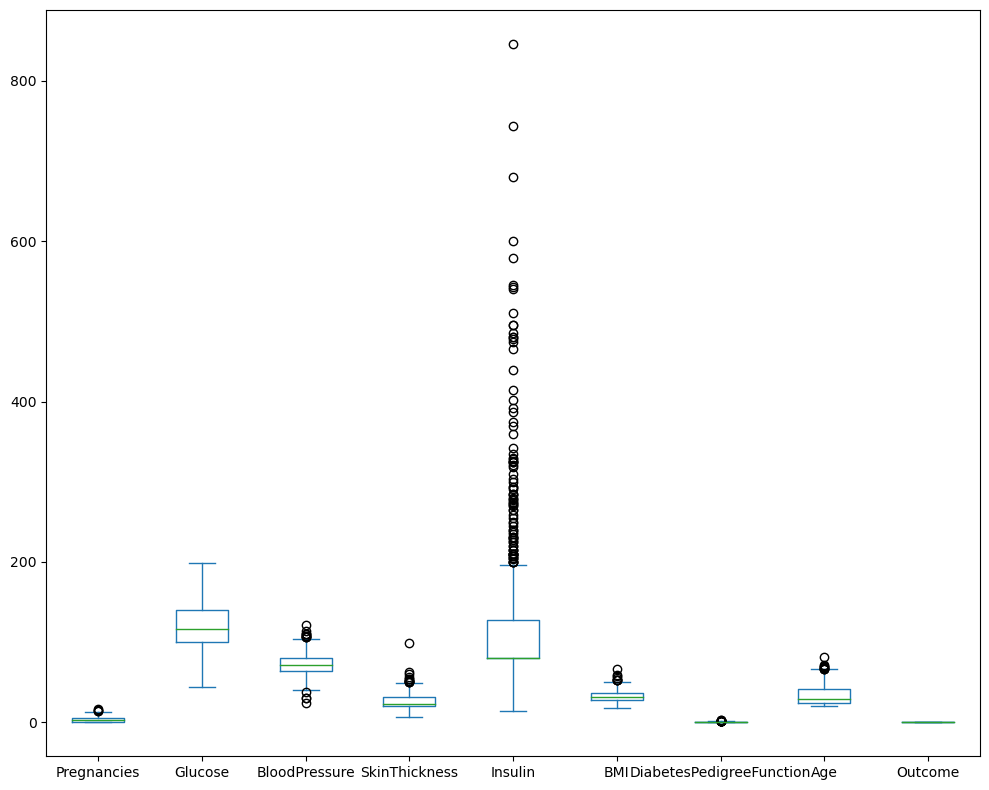

In [43]:

# Box plots
data.plot(kind='box', figsize=(10, 8))
plt.tight_layout()
plt.show()

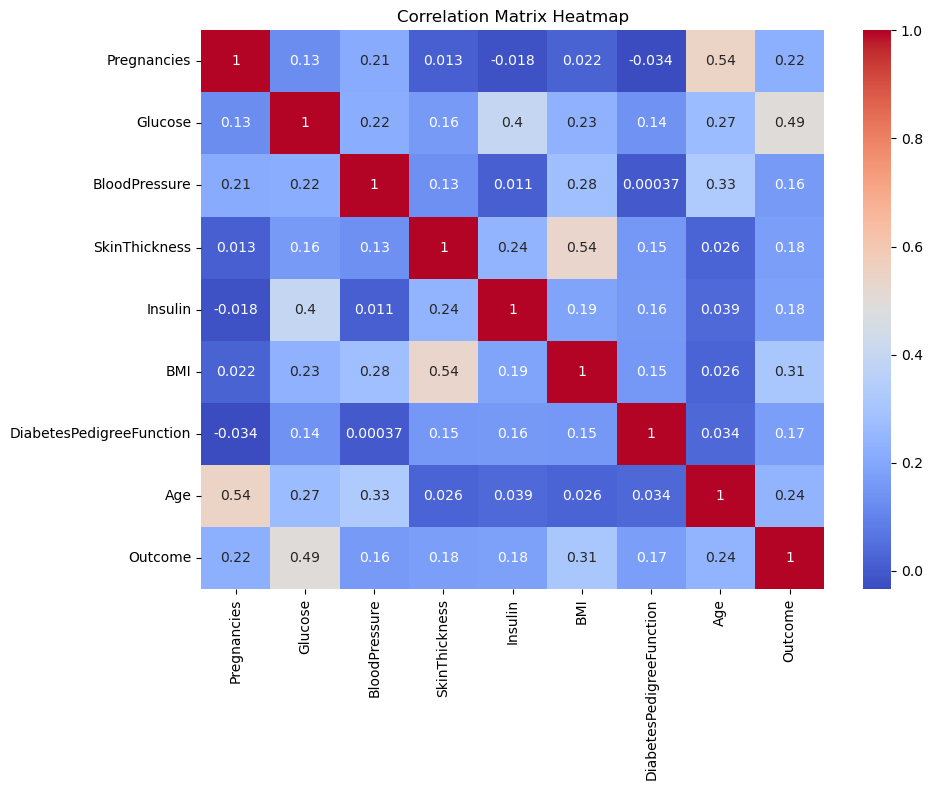

In [45]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()

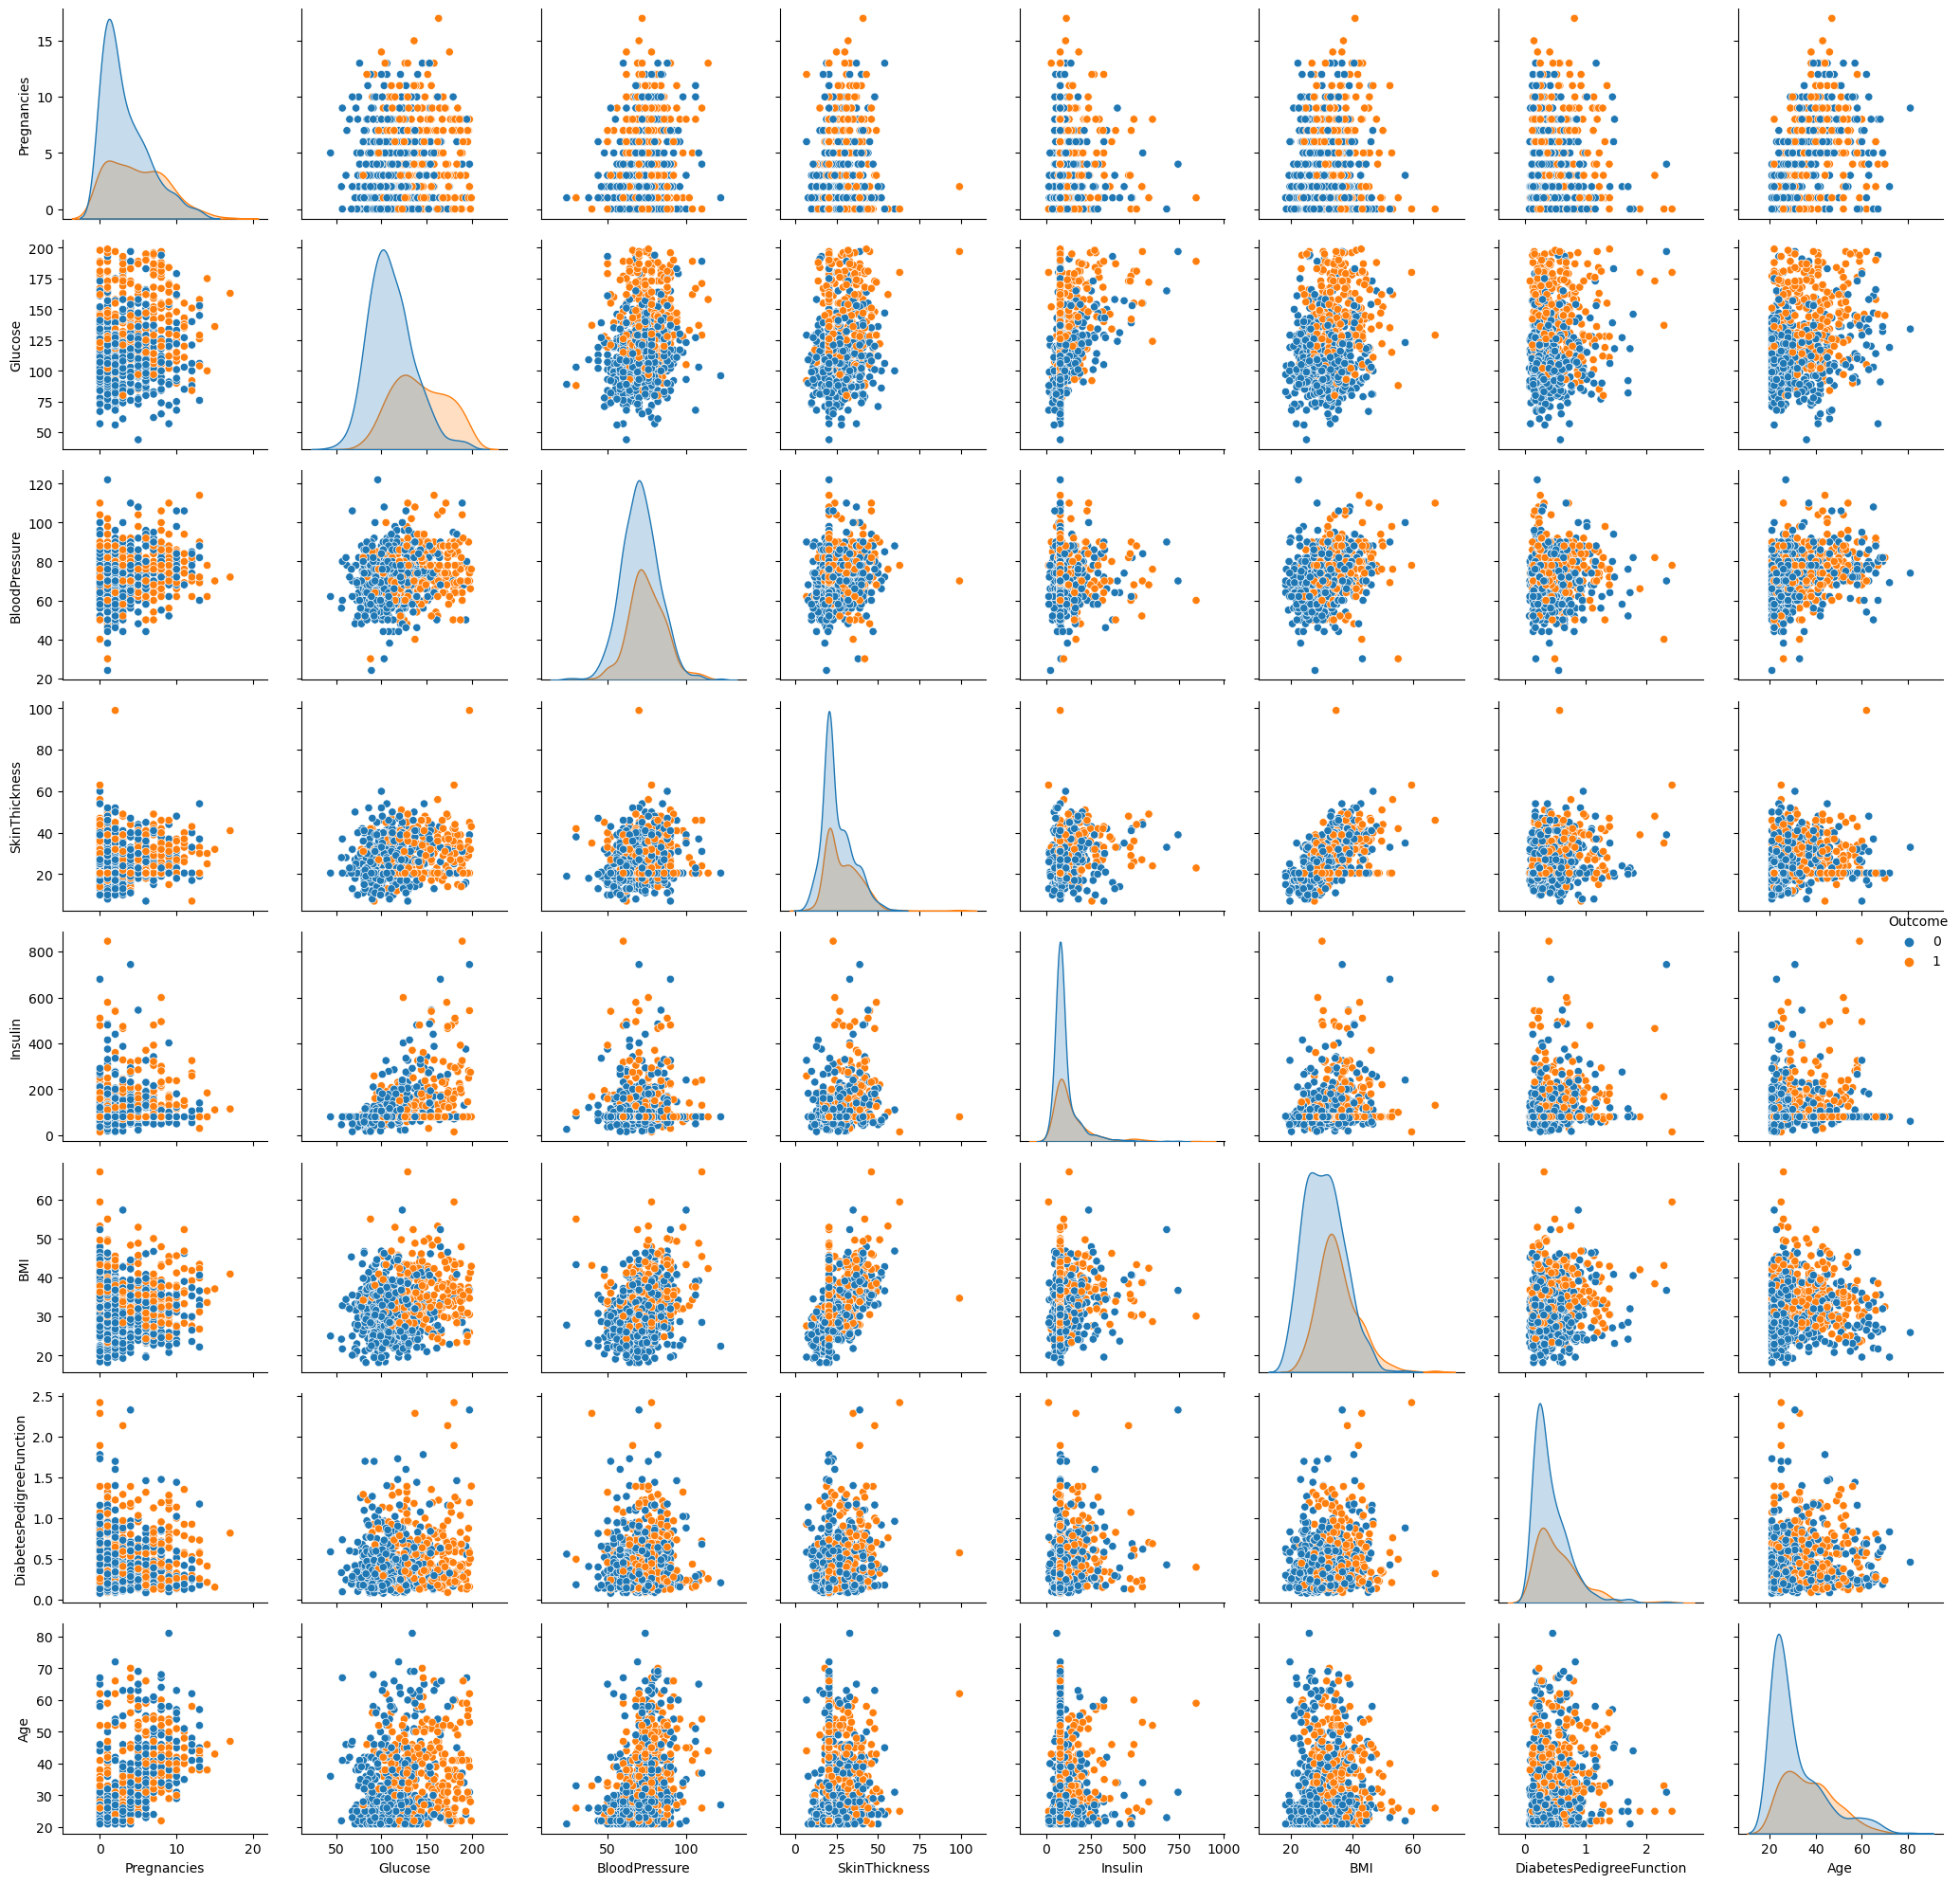

In [46]:
# Pairwise scatter plots
sns.pairplot(data, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome')
plt.tight_layout()
plt.show()

### 5. Check Null Values In The Dataset

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
import numpy as np

In [12]:
data_copy = data.copy(deep=True)

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [15]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

### 7. Store Feature Matrix In X and Response(Target) In Vector y

In [17]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

### 8. Splitting The Dataset Into The Training Set And Test Set

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)

### 9. Scikit-Learn Pipeline

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline

In [20]:
pipeline_lr  = Pipeline([('scalar1',StandardScaler()),
                         ('lr_classifier',LogisticRegression())])

pipeline_knn = Pipeline([('scalar2',StandardScaler()),
                          ('knn_classifier',KNeighborsClassifier())])

pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                         ('svc_classifier',SVC())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(max_depth=3))])
pipeline_gbc = Pipeline([('gbc_classifier',GradientBoostingClassifier())])



In [21]:
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc]

In [22]:
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('scalar3', StandardScaler()), ('svc_classifier', SVC())]),
 Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier(max_depth=3))]),
 Pipeline(steps=[('gbc_classifier', GradientBoostingClassifier())])]

In [23]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [24]:
pipe_dict = {0:'LR',
             1:'KNN',
             2:'SVC',
             3:'DT',
             4: 'RF',
             5: 'GBC'}

In [25]:
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [26]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)*100))

LR Test Accuracy:76.62337662337663
KNN Test Accuracy:76.62337662337663
SVC Test Accuracy:73.37662337662337
DT Test Accuracy:70.12987012987013
RF Test Accuracy:78.57142857142857
GBC Test Accuracy:75.97402597402598


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [29]:
rf =RandomForestClassifier(max_depth=3)

In [30]:
rf.fit(X,y)

RandomForestClassifier(max_depth=3)

### Prediction on New Data

In [31]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,    
},index=[0])

In [32]:
p = rf.predict(new_data)

In [33]:
if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

diabetic


### 18. Save Model Using Joblib

In [34]:
import joblib

In [35]:
joblib.dump(rf,'model_joblib_diabetes')

['model_joblib_diabetes']

In [36]:
model = joblib.load('model_joblib_diabetes')

In [37]:
model.predict(new_data)

array([1])

### GUI

In [38]:
from tkinter import *
import joblib

In [1]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
   
    model = joblib.load('model_joblib_diabetes')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    
    if result == 0:
        Label(master, text="Non-Diabetic").grid(row=31)
    else:
        Label(master, text="Diabetic").grid(row=31)
    
    
master = Tk()
master.title("Diabetes Prediction Using Machine Learning")


label = Label(master, text = "Diabetes Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Pregnancies").grid(row=1)
Label(master, text="Glucose").grid(row=2)
Label(master, text="Enter Value of BloodPressure").grid(row=3)
Label(master, text="Enter Value of SkinThickness").grid(row=4)
Label(master, text="Enter Value of Insulin").grid(row=5)
Label(master, text="Enter Value of BMI").grid(row=6)
Label(master, text="Enter Value of DiabetesPedigreeFunction").grid(row=7)
Label(master, text="Enter Value of Age").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()